In [1]:
### IMPORT LIBRARIES ###

# IMPORT SCIENTIFIC LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'], plt.rcParams['axes.labelsize'] = 14, 18
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit

# IMPORT CUSTOM LIBRARIES
from IN8_read_data import read_IN8scan, read_IN8scan_specJun24, gen_data_df_specJun24
from functions import *
from alias import *

In [2]:
print('Normal conf => Ef =',k2E(5.8), 'meV')
print('HR conf => Ef =',k2E(4.9), 'meV')

Normal conf => Ef = 69.70269243254256 meV
HR conf => Ef = 49.74915711371425 meV


# Data import

In [3]:
### IMPORT OF MEASUREMENTS DATA ###
data = gen_data_df_specJun24('./data/scan_database.tsv', './data/rawdata/')
sumup_col = ['name', 'notes', 'date', 'time', 'QM', 'E', 'steps']
display(data[sumup_col])

,name,notes,date,time,QM,E,steps
Nscan,,,,,,,
50304,sc a5,STOP,03-Jun-24,15:08:38,4.904906,-0.0134,A5= 0.1000
50305,sc a5,Scan a 2theta fisso per allineare l'analizzato...,03-Jun-24,15:08:49,4.904906,-0.0134,A5= 0.2000
50306,sc a3,Allineamento slit nel pentolone a3 => 10,03-Jun-24,15:19:27,4.904922,-0.0134,A3= 2.0000
50307,sc ei 69.68 dei 0.5 np 15 mn 2000,vediamo lo scan in energia,03-Jun-24,15:32:02,4.843829,-3.5464,EI= 0.5000
50308,sc ei 69.68 dei 0.5 np 15 mn 2000,rivediamo lo scan in ei,03-Jun-24,15:41:02,4.842048,-3.5464,EI= 0.5000
...,...,...,...,...,...,...,...
050315+050319+50381+50382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50337+50341+50342,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50349+50350,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Risoluzione con Vanadio
Risoluzione misurata con tondolo di Vanadio (fuori cella) a $Q=.7\AA^{-1}$. Le misure fatte sono:
- misura "ufficiqle" a $Q=.7\AA^{-1}$
- misura di test (fatta al volo prima dell'allineamento delle slit)
- misura di risoluzione con configurazione wrong curvature
- misura di risoluzione conf. HR a $Q=1.5\AA^{-1}$

## Resolution (normal conf.) at Q=$0.7 \AA^{-1}$

Gaussian fit results:
x0 = 0.02 +/- 0.02 meV
FWHM = 2.08 +/- 0.03 meV


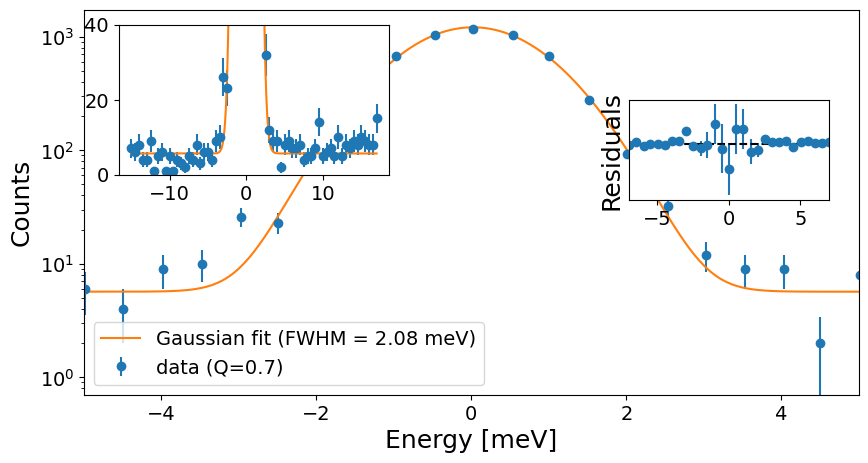

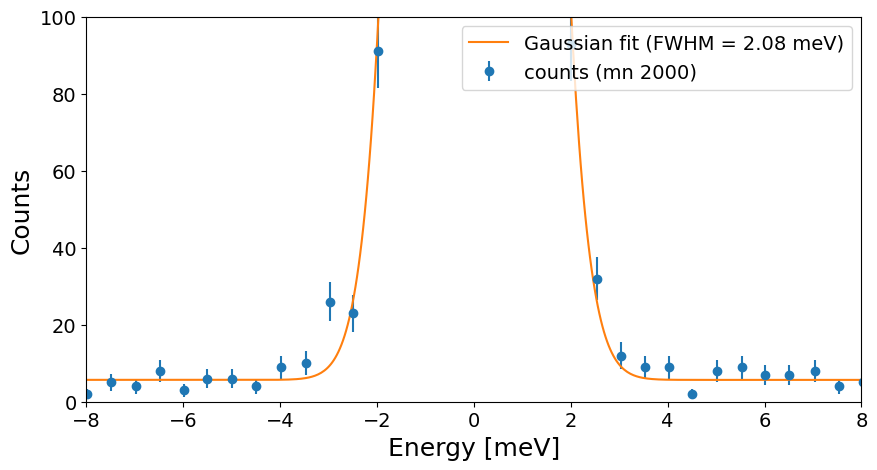

In [17]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='data (Q=0.7)')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,5)
plt.hlines(0, -5, 5, color='k', ls='--')
plt.yscale('log')

# add above as an inset figure
plt.axes([0.16, 0.55, 0.27, 0.3])
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o')
plt.plot(X, gauss(X, *popt))
plt.ylim(0,40)

# and add residuals
plt.axes([0.67, 0.5, 0.2, 0.2])
plt.errorbar(S.EN, S.CNTS - gauss(S.EN, *popt), yerr=S.dCNTS, fmt='o')
plt.axhline(0, color='k', ls='--')
plt.ylabel('Residuals')
plt.xlim(-7,7)
plt.yticks([])


# ZOOM
plt.figure(figsize=(10,5))
S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000)')
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-8,8)
plt.ylim(0,100)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))


## Resolution during alligment (normal conf.) at Q=$0.7 \AA^{-1}$ (fast test)
Guardo come è invece la risoluzione del primo test che avevamo fatto (durante l'allineamento). Risulta identica!

Gaussian fit results:
x0 = 69.67 +/- 0.02 meV (working at Ef = 69.7 meV)
FWHM = 2.07 +/- 0.03 meV


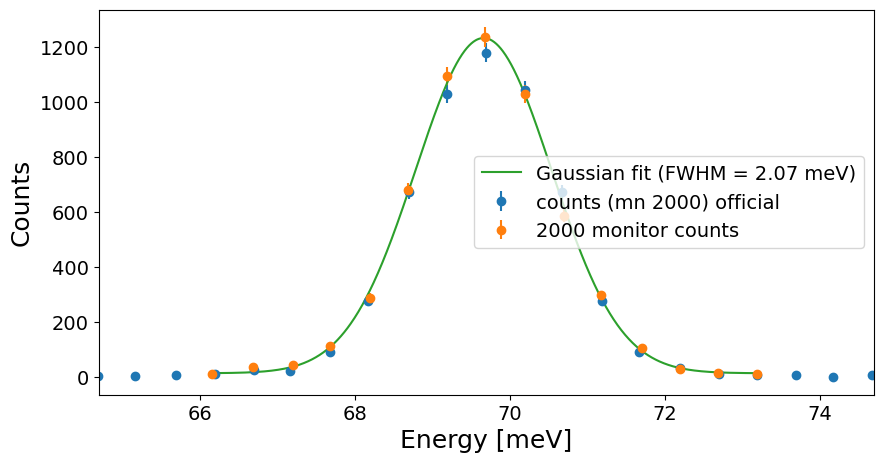

In [5]:
plt.figure(figsize=(10,5))

S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN+69.67, S.CNTS, yerr=S.dCNTS, fmt='o', label='counts (mn 2000) official')

S = data.loc[Nvana['.7_test']].data
plt.errorbar(S.EI, S.CNTS, yerr=S.dCNTS, fmt='o', label='2000 monitor counts')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EI, S.CNTS, sigma=S.dCNTS, p0=[1000, 70, 1, 0])
X = np.linspace(S.EI.min(), S.EI.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(69.7-5,69.7+5)

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV (working at Ef = 69.7 meV)'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))

## Comparison of resolutions (normal conf): correct vs wrong curvature configuration

Gaussian fit results:
x0 = 0.12 +/- 0.01 meV (working at Ef = 69.7 meV)
FWHM = 2.00 +/- 0.03 meV


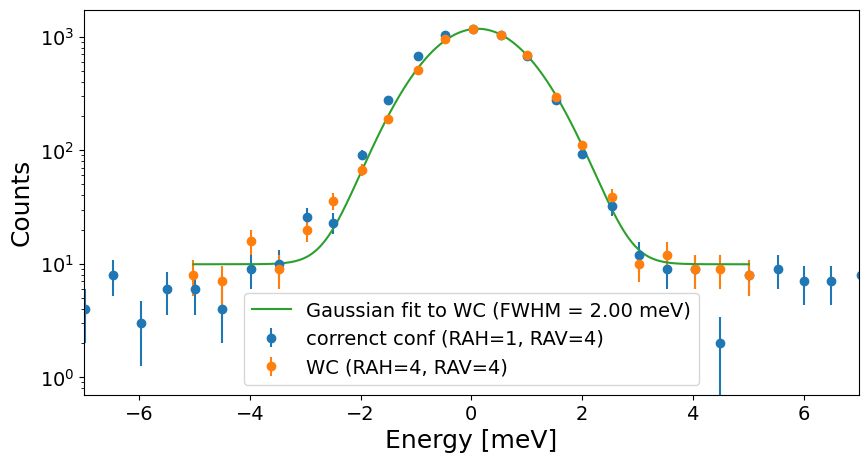

In [15]:
plt.figure(figsize=(10,5))

S = data.loc[Nvana[.7]].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='correnct conf (RAH=1, RAV=4)')

S = data.loc[Nvana['.7WC']].data
plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='WC (RAH=4, RAV=4)')

gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c

popt, pcov = curve_fit(gauss, S.EN, S.CNTS, sigma=S.dCNTS, p0=[1000,0, 1, 0])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit to WC (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-7,+7)
plt.yscale('log')

# print of the fit results
print('Gaussian fit results:')
print('x0 = {:.2f} +/- {:.2f} meV (working at Ef = 69.7 meV)'.format(popt[1], np.sqrt(pcov[1,1])))
print('FWHM = {:.2f} +/- {:.2f} meV'.format(popt[2], np.sqrt(pcov[2,2])))

In [7]:
# resolution function (usefull for later)
resf = lambda x: np.exp(-(x)**2/(2*(2.08/2.355)**2))

## Resolution (HR) at Q=$1.5 \AA^{-1}$

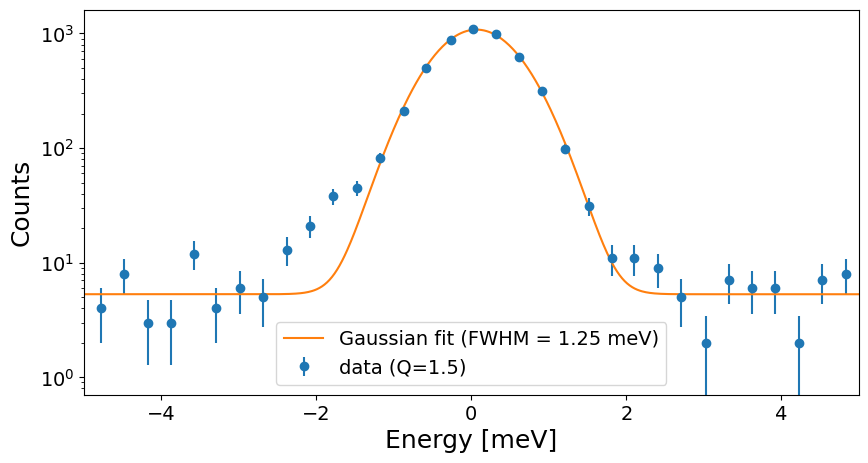

In [13]:
plt.figure(figsize=(10,5))
S = data.loc[Nvana['1.5HR']].data

plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, fmt='o', label='data (Q=1.5)')

#fit
popt, pcov = curve_fit(gauss, S.EN[(S.EN>-5) & (S.EN<5)], S.CNTS[(S.EN>-5) & (S.EN<5)], sigma=S.dCNTS[(S.EN>-5) & (S.EN<5)])
X = np.linspace(S.EN.min(), S.EN.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (FWHM = {:.2f} meV)'.format(popt[2]))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-5,5)
plt.yscale('log')

# Empty cells
We have empty cell measurements at two temperatures: 300K and 160K.

(-7.0, 7.0)

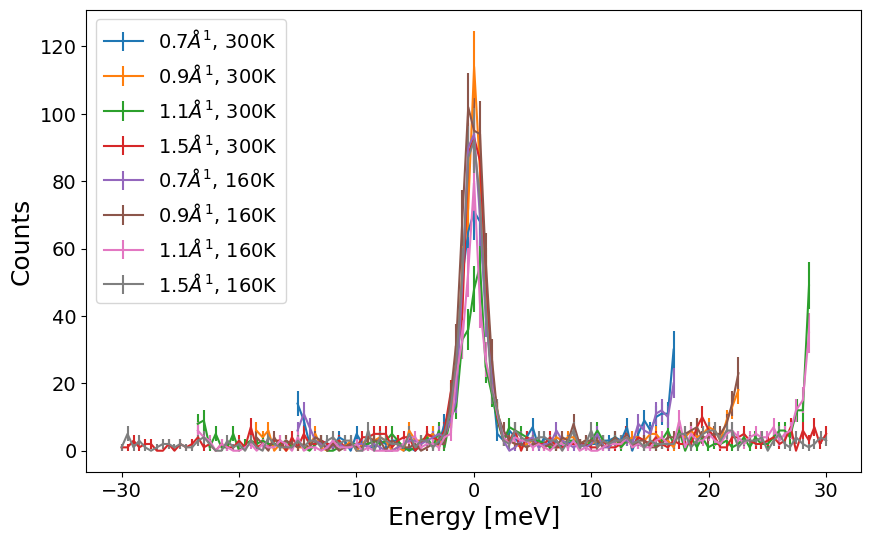

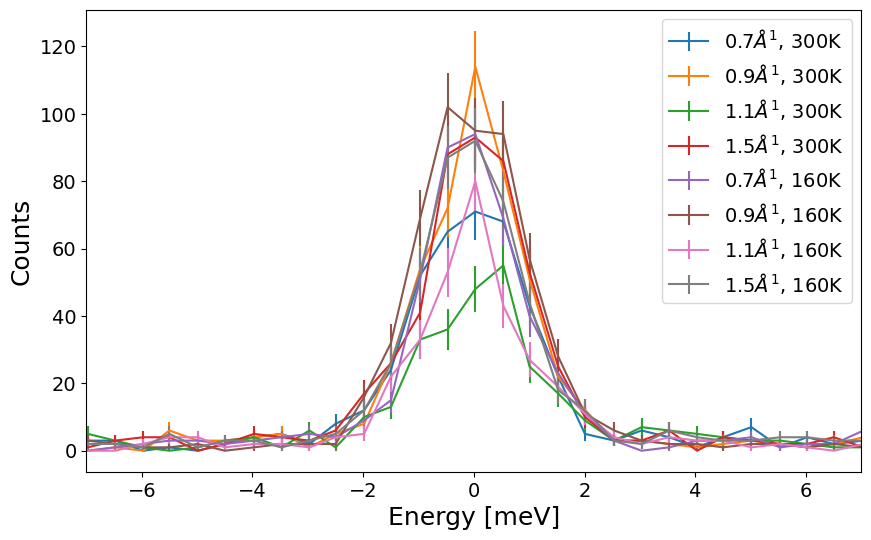

In [8]:
plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\\AA^1$, {:.0f}K'.format(q, T))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')


plt.figure(figsize=(10,6))
for T in [300, 160]:
    for q in [.7, .9, 1.1, 1.5]:
        S = data.loc[Nempty[T,q]].data
        plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\\AA^1$, {:.0f}K'.format(q, T))
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.xlim(-7,7)

## Comparison of same Q at different Temperatures
As a result, we can work with a single empty cell, summing the two at different T for encrising the statistics.

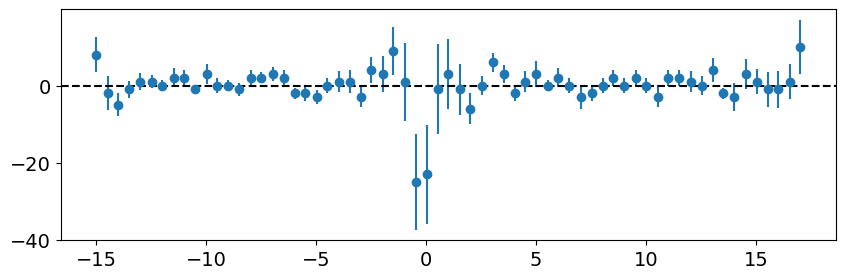

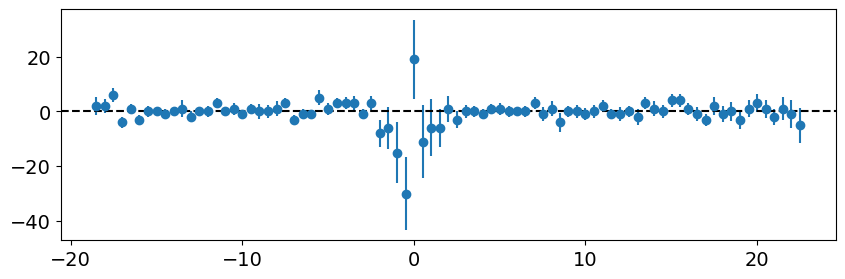

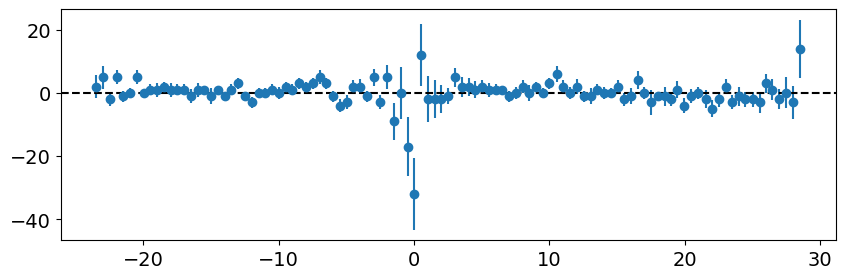

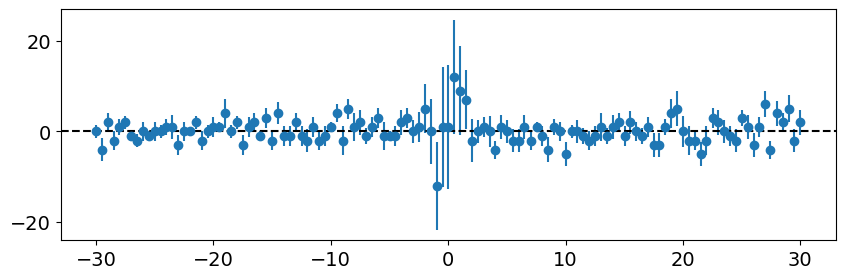

In [9]:
for q in [.7, .9, 1.1, 1.5]:
    plt.figure(figsize=(10,3))
    S1 = data.loc[Nempty[300,q]].data
    S2 = data.loc[Nempty[160,q]].data
    plt.errorbar(S1.EN, S1.CNTS-S2.CNTS, yerr=np.sqrt(S1.dCNTS**2 + S2.dCNTS**2), label='{:.1f}$\\AA^1$'.format(q), fmt = 'o')
    plt.axhline(0, color='k', ls='--')

## Averaged empty cells

(0.0, 250.0)

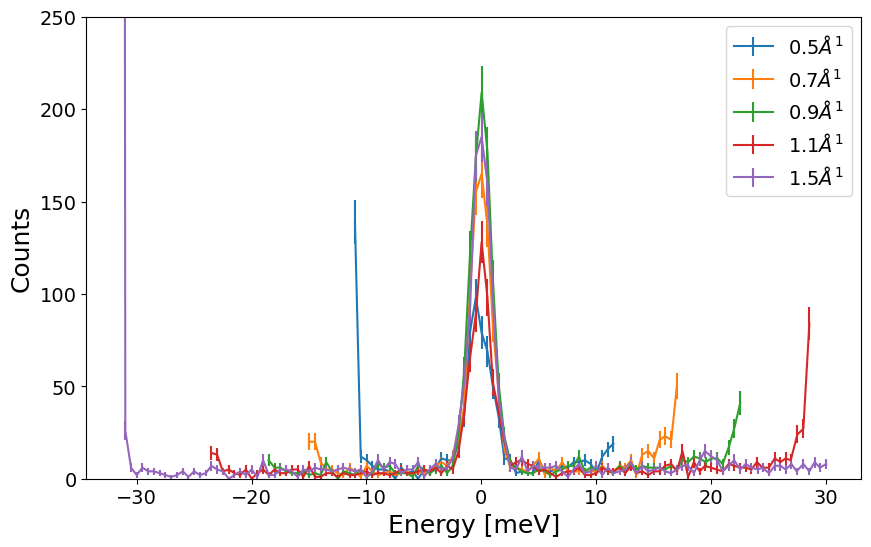

In [10]:
plt.figure(figsize=(10,6))
for q in Qs:
    S = data.loc[Nempty[q]].data
    plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label=r'{:.1f}$\AA^1$'.format(q))
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.ylim(0,250)

## S(Q) of empty cell


| Alluminium reflection | Q[$\AA^{-1}$]
|-----------------------|--------------
| (111)                 | 2.6877
| (002)                 | 3.1035

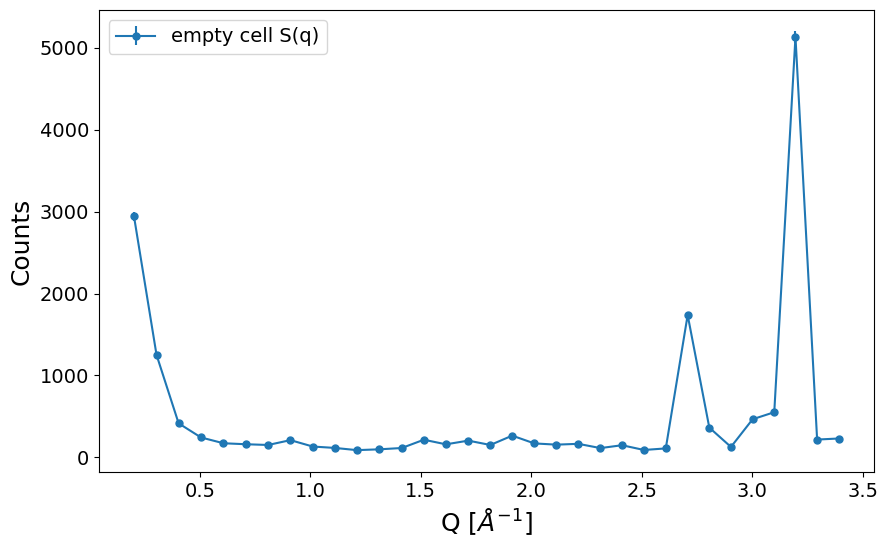

In [11]:
Sq_al = data.loc[NSq_al].data.copy()
Sq_al.index = 2*Sq_al.index-1

plt.figure(figsize=(10,6))
plt.errorbar(Sq_al.QM, Sq_al.CNTS, yerr=Sq_al.dCNTS, label='empty cell S(q)', ms = 5, fmt='o-')
plt.xlabel('Q [$\\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

# Absorber measurement (cadmium)

(0.0, 250.0)

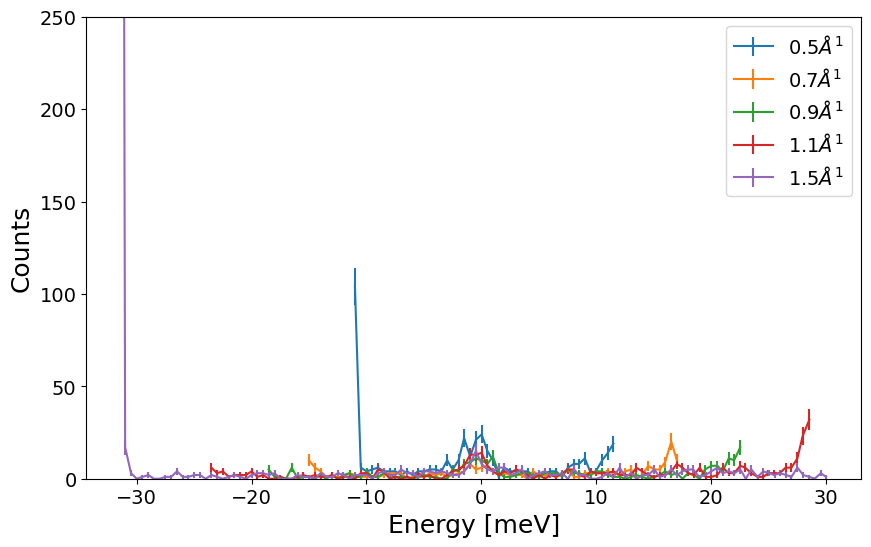

In [12]:
plt.figure(figsize=(10,6))
for q in Qs:
    S = data.loc[Ncad[q]].data
    plt.errorbar(S.EN, S.CNTS, yerr=S.dCNTS, label='{:.1f}$\\AA^1$'.format(q))
plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Counts')
plt.ylim(0,250)

# S(Q) of glycerol

(3.0, 3.5)

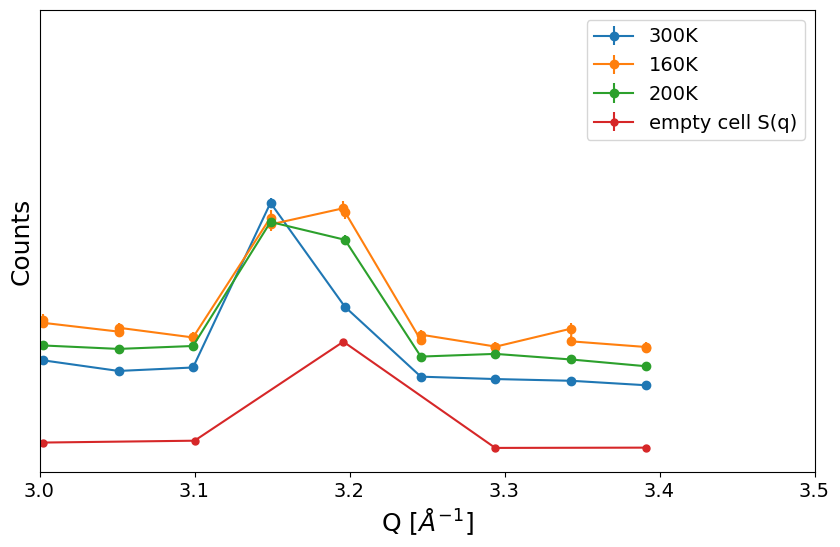

In [14]:
plt.figure(figsize=(10,6))

for T in [300, 160, 200]:
    S = data.loc[NSq_gly[T]].data
    plt.errorbar(S.QM, S.CNTS/S.M1, yerr=S.dCNTS/S.M1, label='{:.0f}K'.format(T), fmt='o-')

plt.errorbar(Sq_al.QM, Sq_al.CNTS/Sq_al.M1, yerr=Sq_al.dCNTS/Sq_al.M1, label='empty cell S(q)', ms = 5, fmt='o-')

plt.yticks([])
plt.xlabel('Q [$\\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()
plt.xlim(3,3.5)

(0.0, 14.0)

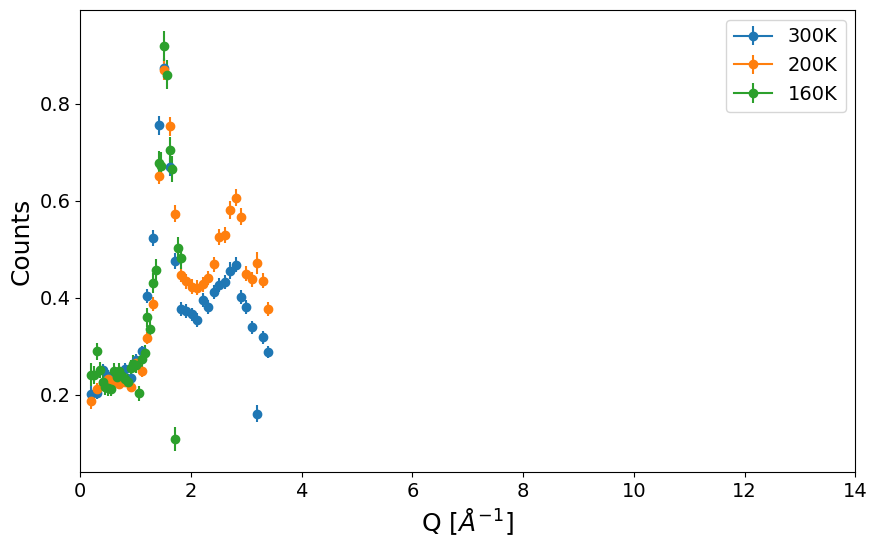

In [79]:
plt.figure(figsize=(10,6))

for T in [300, 200, 160]:
    S = data.loc[NSq_gly[T]].data
    plt.errorbar(S.QM, S.CNTS/S.M1-Sq_al.CNTS/Sq_al.M1, yerr=S.dCNTS/S.M1, label='{:.0f}K'.format(T), fmt='o-')

plt.xlabel('Q [$\\AA^{-1}$]')
plt.ylabel('Counts')
plt.legend()

plt.xlim(0,14)

# First view of glycerol

## Comparison with background

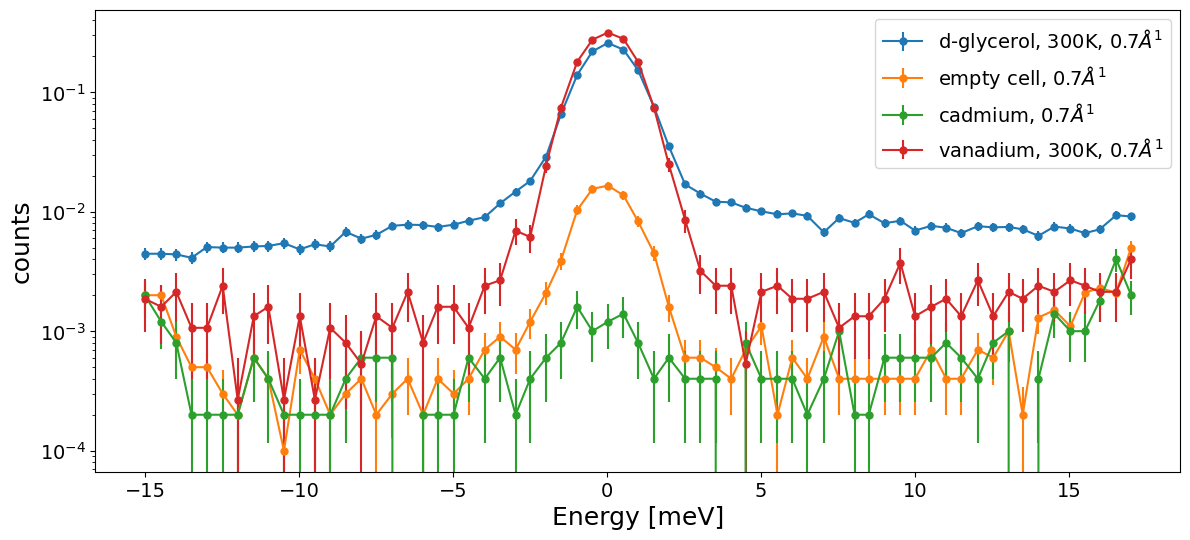

In [80]:
################
q = .7
T = 300
################

S_gly = data.loc[Ngly[T,q]].data
S_empty = data.loc[Nempty[q]].data
S_cad = data.loc[Ncad[q]].data
S_vana = data.loc[Nvana[.7]].data

EN = S_gly.EN

plt.figure(figsize=(14,6))
plt.errorbar(EN, S_gly.CNTS/S_gly.M1, yerr=S_gly.dCNTS/S_gly.M1, label='d-glycerol, {:.0f}K, {:.1f}$\\AA^1$'.format(T,q), ms = 5, fmt='o-')
plt.errorbar(EN, S_empty.CNTS/S_empty.M1, yerr=S_empty.dCNTS/S_empty.M1, label='empty cell, {:.1f}$\\AA^1$'.format(q), ms = 5, fmt='o-')
plt.errorbar(EN, S_cad.CNTS/S_cad.M1, yerr=S_cad.dCNTS/S_cad.M1, label='cadmium, {:.1f}$\\AA^1$'.format(q), ms = 5, fmt='o-')
plt.errorbar(S_vana.EN, .8*S_vana.CNTS/S_vana.M1, yerr=S_vana.dCNTS/S_vana.M1, label='vanadium, 300K, 0.7$\\AA^1$', ms = 5, fmt='o-')

plt.xlabel('Energy [meV]')
plt.ylabel('counts')
plt.legend()
plt.yscale('log')

## 300K

(0.0, 0.05)

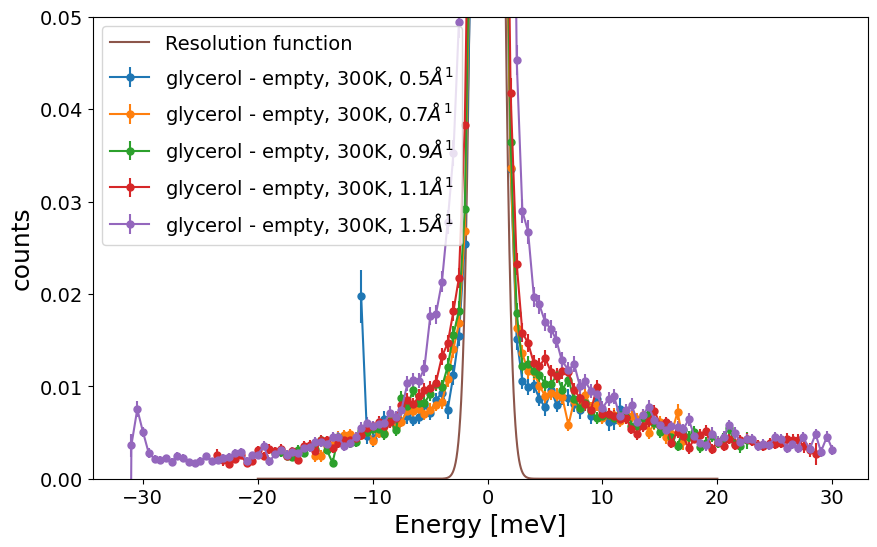

In [81]:
plt.figure(figsize=(10,6))

for q in Qs:
    S_gly = data.loc[Ngly[300,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 300K, {:.1f}$\\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')

plt.xlabel('Energy [meV]')
plt.ylabel('counts')
plt.legend()
plt.ylim(0, 0.05)

## 160K

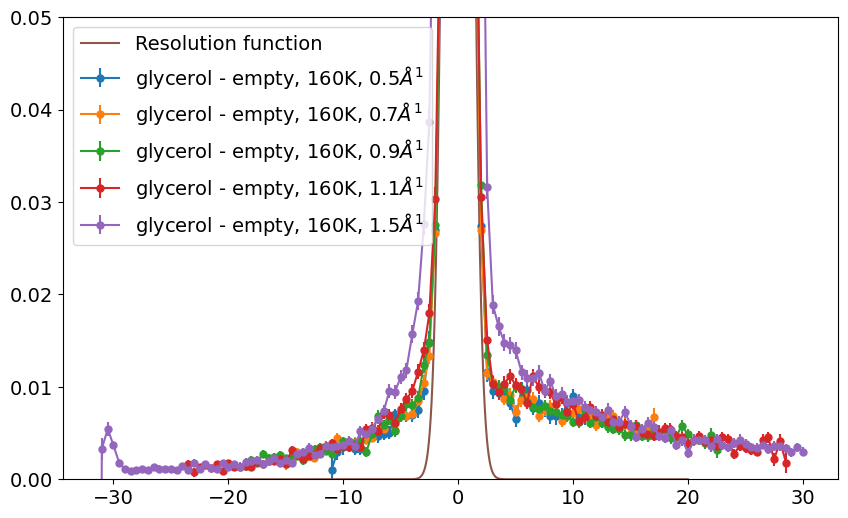

In [82]:
plt.figure(figsize=(10,6))

for q in [.5, .7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[160,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.ylim(0, 0.05)
plt.legend()

## 200K

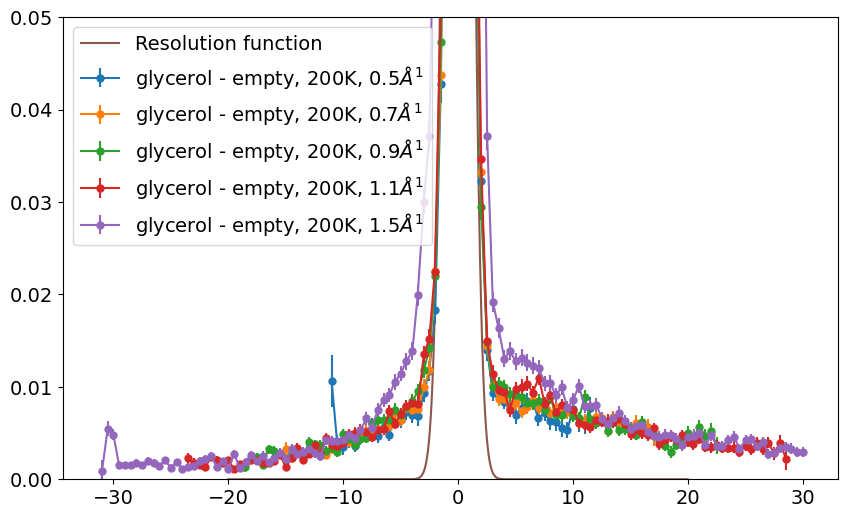

In [83]:
plt.figure(figsize=(10,6))

for q in [.5, .7, .9, 1.1, 1.5]:
    S_gly = data.loc[Ngly[200,q]].data
    S_empty = data.loc[Nempty[q]].data
    CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
    dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
    EN = S_gly.EN
    plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 200K, {:.1f}$\\AA^1$'.format(q), ms = 5, fmt='o-')

X = np.linspace(-20,20,1000)
plt.plot(X, resf(X)*.25, label='Resolution function')
plt.ylim(0, 0.05)
plt.legend()

## T comparison

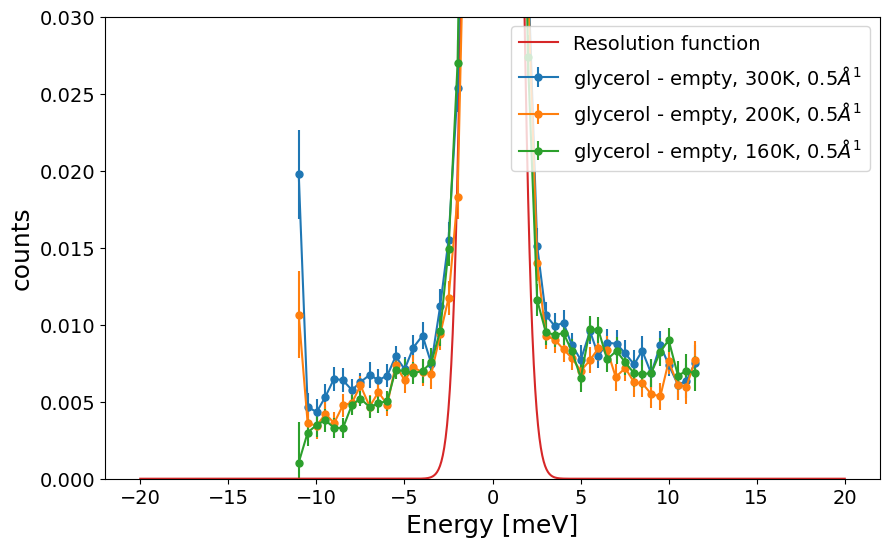

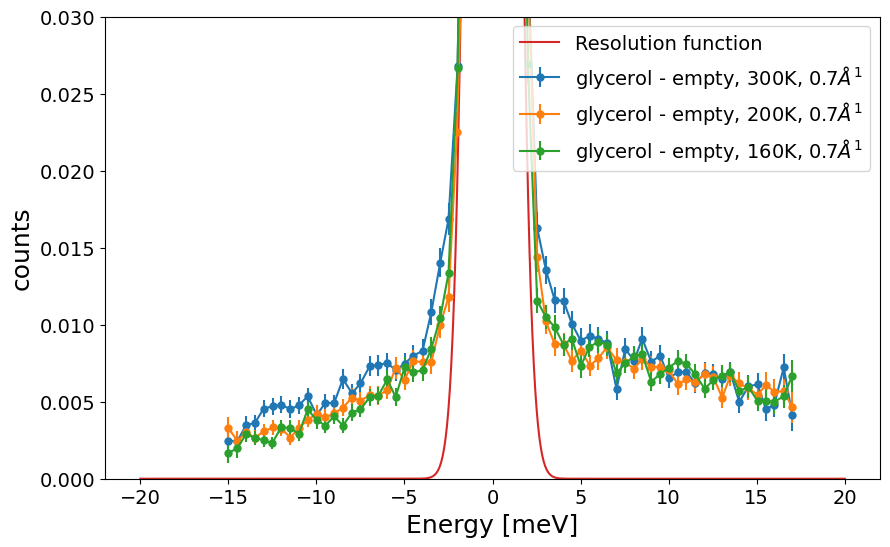

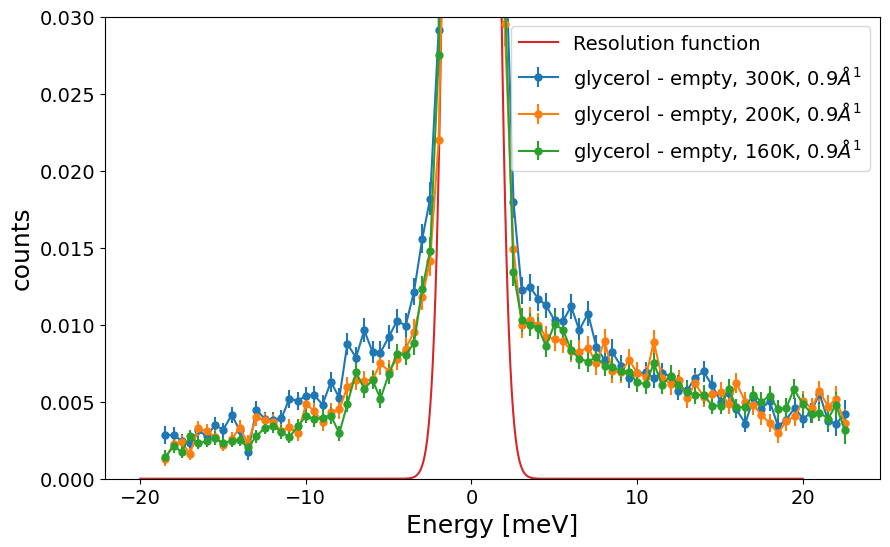

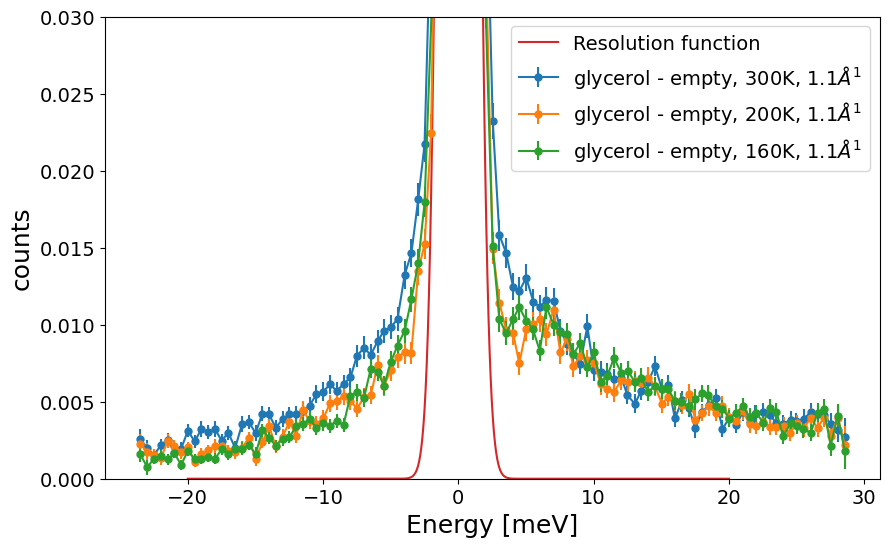

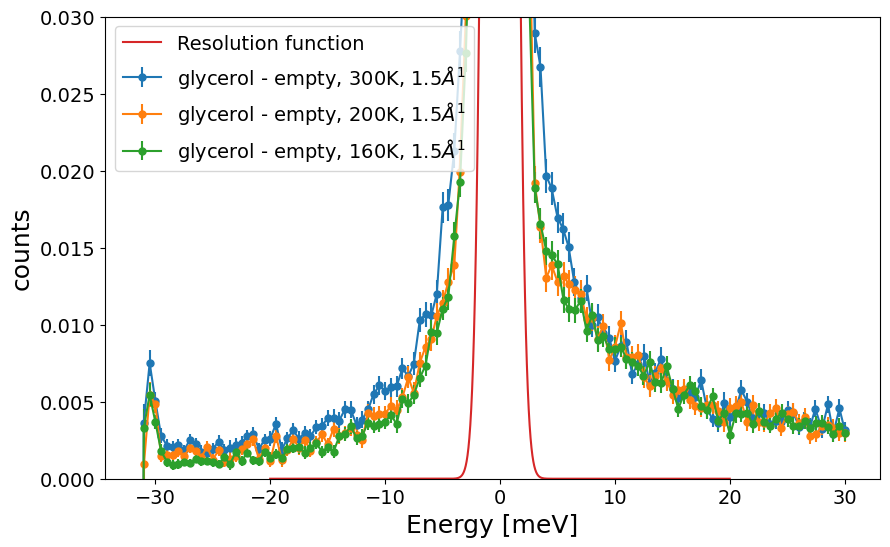

In [84]:
for q in Qs:
    plt.figure(figsize=(10,6))
    plt.xlabel('Energy [meV]')
    plt.ylabel('counts')
    for T in [300, 200, 160]:
        try:
                S_gly = data.loc[Ngly[T,q]].data
                S_empty = data.loc[Nempty[q]].data
                CNTS = (S_gly.CNTS/S_gly.M1 - S_empty.CNTS/S_empty.M1)
                dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2 + (S_empty.dCNTS/S_empty.M1)**2) 
                EN = S_gly.EN
                plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, {:}K, {:.1f}$\\AA^1$'.format(T,q), ms = 5, fmt='o-')
        except:pass
    plt.plot(X, resf(X)*.25, label='Resolution function')
    plt.ylim(0, .03)
    plt.legend()

## Quasielastic (temp)

<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
<>:7: SyntaxWarning: invalid escape sequence '\A'
<>:13: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_151119/4285226880.py:7: SyntaxWarning: invalid escape sequence '\A'
  plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')
/tmp/ipykernel_151119/4285226880.py:13: SyntaxWarning: invalid escape sequence '\A'
  plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol HR, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')


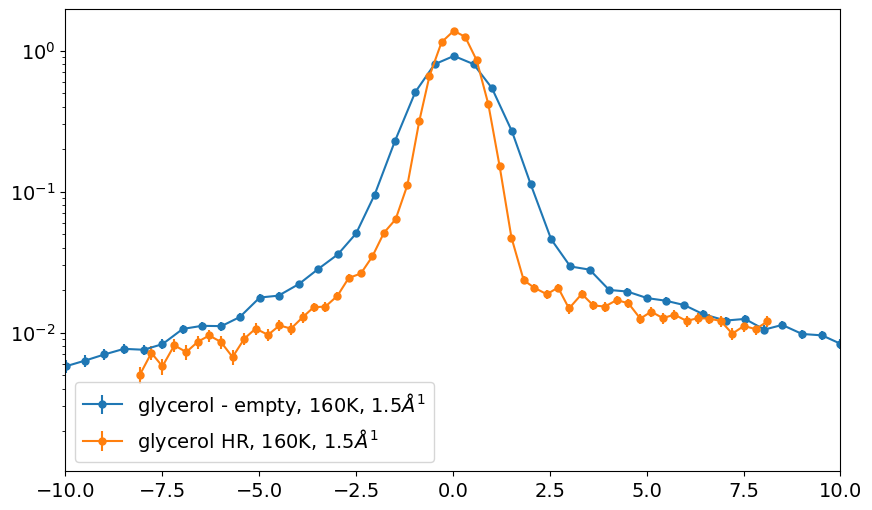

In [96]:
plt.figure(figsize=(10,6))

S_gly = data.loc[Ngly[300,1.5]].data
CNTS = (S_gly.CNTS/S_gly.M1)
dCNTS = np.sqrt((S_gly.dCNTS/S_gly.M1)**2) 
EN = S_gly.EN
plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol - empty, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

S_gly = data.loc[50343].data
CNTS = S_gly.CNTS/S_gly.M1*1.7
dCNTS = S_gly.dCNTS/S_gly.M1*1.7
EN = S_gly.EN
plt.errorbar(EN, CNTS, yerr=dCNTS, label='glycerol HR, 160K, {:.1f}$\AA^1$'.format(q), ms = 5, fmt='o-')

#plt.ylim(0, 0.05)
plt.xlim(-10,10)
plt.yscale('log')
plt.legend()


# Problema theta zero non centrato

Text(0, 0.5, 'M2 counts')

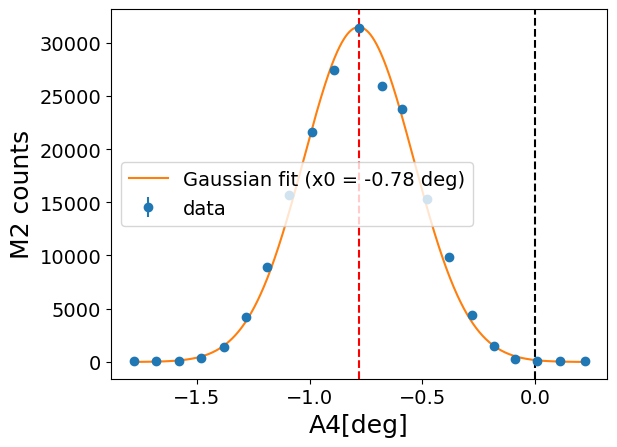

In [86]:
S = data.loc[50373].data

plt.errorbar(S.A4, S.M2, yerr=np.sqrt(S.M2), fmt='o', label='data')
# gaussian fit
gauss = lambda x, A, x0, FWHM, c: A*np.exp(-(x-x0)**2/(2*(FWHM/2.355)**2)) + c
popt, pcov = curve_fit(gauss, S.A4, S.M2, sigma=np.sqrt(S.M2), p0=[1000, 0, 1, 0])
X = np.linspace(S.A4.min(), S.A4.max(), 1000)
plt.plot(X, gauss(X, *popt), label='Gaussian fit (x0 = {:.2f} deg)'.format(popt[1]))

plt.axvline(popt[1], color='r', ls='--')
plt.axvline(0, color='k', ls='--')

plt.legend()
plt.xlabel('A4[deg]')
plt.ylabel('M2 counts')

Text(0, 0.5, 'M2 counts')

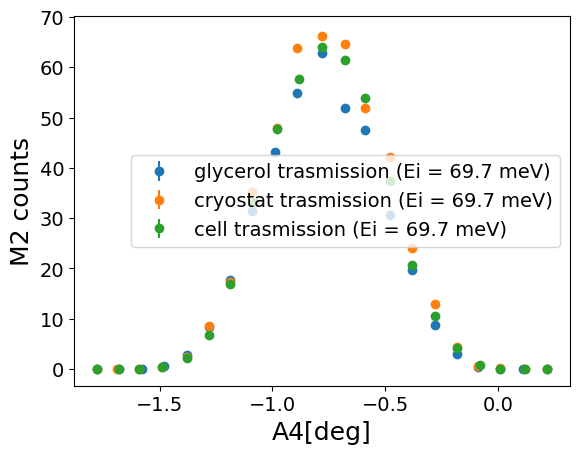

In [87]:
S = data.loc[50373].data
plt.errorbar(S.A4, S.M2/S.M1, yerr=np.sqrt(S.M2)/S.M1, fmt='o', label='glycerol trasmission (Ei = 69.7 meV)')
S = data.loc[50377].data
plt.errorbar(S.A4, S.M2/S.M1, yerr=np.sqrt(S.M2)/S.M1, fmt='o', label='cryostat trasmission (Ei = 69.7 meV)')
S = data.loc[50378].data
plt.errorbar(S.A4, S.M2/S.M1, yerr=np.sqrt(S.M2)/S.M1, fmt='o', label='cell trasmission (Ei = 69.7 meV)')

plt.legend()
plt.xlabel('A4[deg]')
plt.ylabel('M2 counts')

In [88]:
dA4 = -.78

### Cosa significa questo errore?

In [89]:
Q = lambda omega, theta, Ef: 2*np.pi*np.sqrt(Ef/81.80) * np.sqrt(2 + omega/Ef - 2*np.sqrt(1 + omega/Ef)*np.cos(theta))

<>:11: SyntaxWarning: invalid escape sequence '\A'
<>:11: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_151119/551742416.py:11: SyntaxWarning: invalid escape sequence '\A'
  plt.ylabel('Q [$\AA^{-1}$]')


Text(0, 0.5, 'Q [$\\AA^{-1}$]')

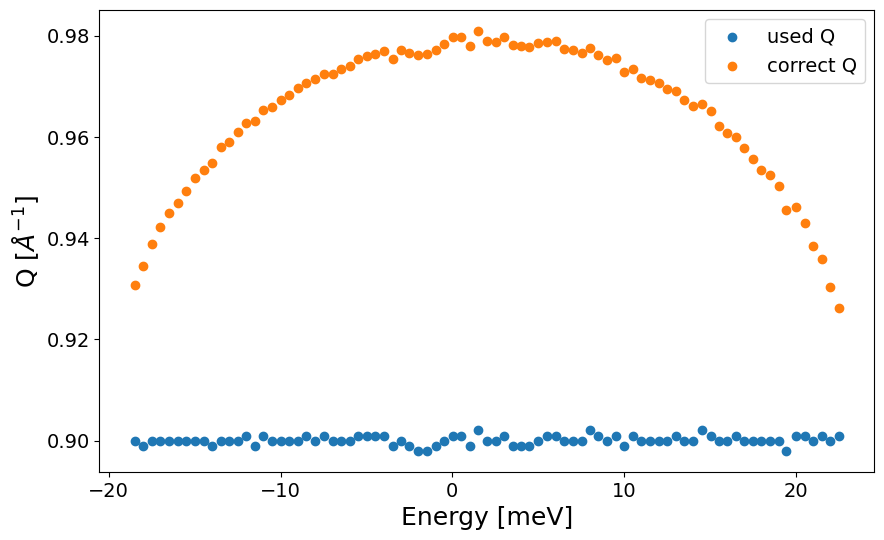

In [90]:
S = data.loc[Ngly[160, .9]].data

Q_correct = Q(S.EN, np.pi/180*(S.A4+dA4), 69.7)

plt.figure(figsize=(10,6))
plt.scatter(S.EN, S.QM, label='used Q')
plt.scatter(S.EN, Q_correct, label='correct Q')

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Q [$\AA^{-1}$]')

# Trasmission measurements

In [91]:
S_gly = data.loc[NT['gly']].data
S_cell = data.loc[NT['cell']].data
S_cryo = data.loc[NT['cryo']].data

Text(0, 0.5, 'M2 counts/M1 counts')

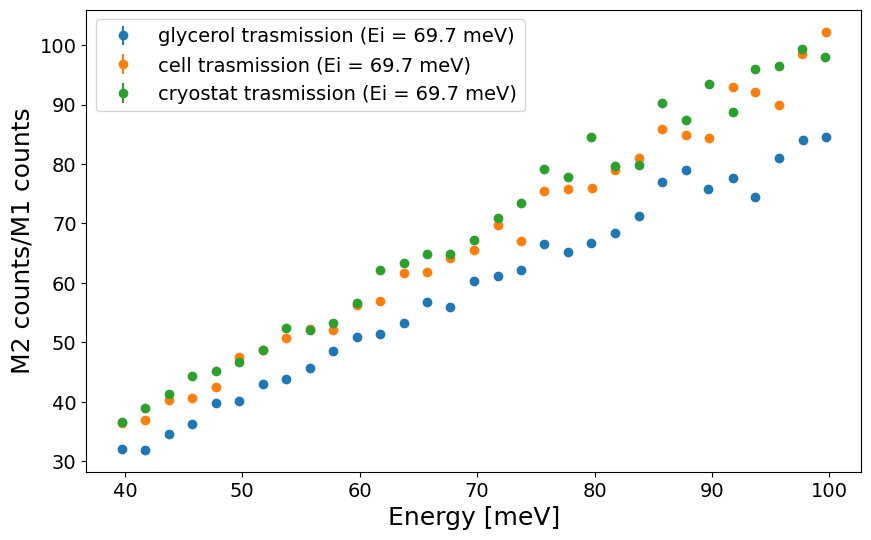

In [92]:
plt.figure(figsize=(10,6))
plt.errorbar(S_gly.EI, S_gly.M2/S_gly.M1, yerr=np.sqrt(S_gly.M2)/S_gly.M1, fmt='o', label='glycerol trasmission (Ei = 69.7 meV)')
plt.errorbar(S_cell.EI, S_cell.M2/S_cell.M1, yerr=np.sqrt(S_cell.M2)/S_cell.M1, fmt='o', label='cell trasmission (Ei = 69.7 meV)')
plt.errorbar(S_cryo.EI, S_cryo.M2/S_cryo.M1, yerr=np.sqrt(S_cryo.M2)/S_cryo.M1, fmt='o', label='cryostat trasmission (Ei = 69.7 meV)')

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('M2 counts/M1 counts')

Text(0, 0.5, 'M2 counts/time')

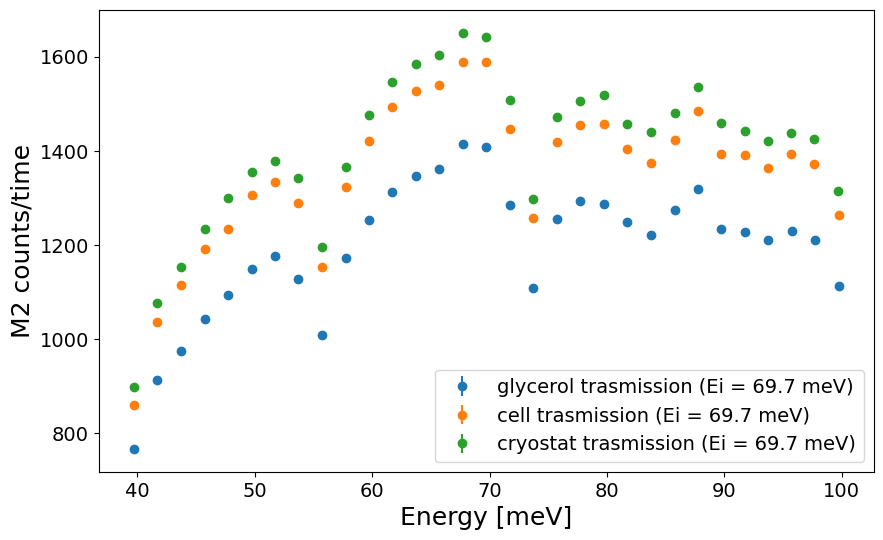

In [93]:
plt.figure(figsize=(10,6))
plt.errorbar(S_gly.EI, S_gly.M2/S_gly.TIME, yerr=np.sqrt(S_gly.M2)/S_gly.TIME, fmt='o', label='glycerol trasmission (Ei = 69.7 meV)')
plt.errorbar(S_cell.EI, S_cell.M2/S_cell.TIME, yerr=np.sqrt(S_cell.M2)/S_cell.TIME, fmt='o', label='cell trasmission (Ei = 69.7 meV)')
plt.errorbar(S_cryo.EI, S_cryo.M2/S_cryo.TIME, yerr=np.sqrt(S_cryo.M2)/S_cryo.TIME, fmt='o', label='cryostat trasmission (Ei = 69.7 meV)')

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('M2 counts/time')

T = 0.89 +/- 0.00


Text(0, 0.5, 'Transmission')

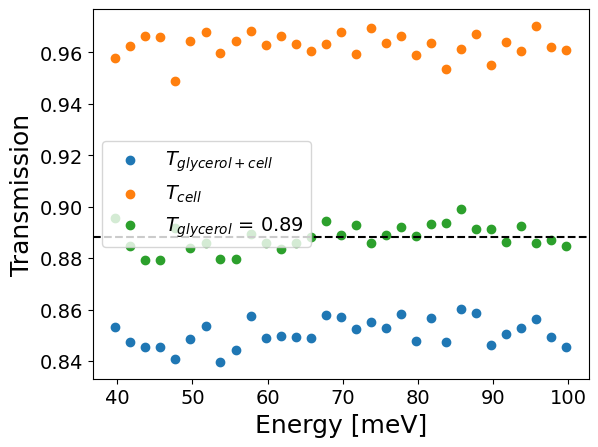

In [94]:
T_gly_cell = S_gly.M2/S_gly.TIME / (S_cryo.M2/S_cryo.TIME)
T_cell = S_cell.M2/S_cell.TIME / (S_cryo.M2/S_cryo.TIME)
T_gly = T_gly_cell + (1-T_cell)

plt.scatter(S_gly.EI, T_gly_cell, label='$T_{glycerol+cell}$')
plt.scatter(S_gly.EI, T_cell, label='$T_{cell}$')

T = np.mean(T_gly)
print('T = {:.2f} +/- {:.2f}'.format(T, np.std(T_gly)))
plt.axhline(T, color='k', ls='--')
plt.scatter(S_gly.EI, T_gly, label='$T_{glycerol}$ = '+str(round(T,2)))

plt.legend()
plt.xlabel('Energy [meV]')
plt.ylabel('Transmission')